In [20]:
# Importo las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input


In [21]:
# Cargar los datos desde un archivo CSV
# Montamos la unidad donde se encuentra nuestro archivo de datos
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
# Leemos el archivo CSV
data = pd.read_csv("/content/drive/MyDrive/CDSMT/IntensidadesTiempoBase_Actualizado.csv", sep=",", encoding="latin1")

In [23]:
# Preparación de datos

# Seleccionamos la columna para predicción (Vamos a usar en este ejemplo IMDL)
traffic = data["IMDL"].values.reshape(-1, 1)

# Escalamos los datos entre 0 y 1 para normalizar la información y optimizar el
# rendimiento de la red LSMT
scaler = MinMaxScaler(feature_range=(0, 1))
traffic_scaled = scaler.fit_transform(traffic)


In [24]:
# Preparación del modelo

# Creamos secuencias para el modelo LSTM
sequence_length = 30  # Usa los 30 días anteriores para predecir
X, y = [], []
for i in range(sequence_length, len(traffic_scaled)):
    X.append(traffic_scaled[i-sequence_length:i, 0])
    y.append(traffic_scaled[i, 0])

X, y = np.array(X), np.array(y)

# Dividimos en conjuntos de entrenamiento y prueba
split = int(0.8 * len(X))

X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de X_test:", X_test.shape)

print("Longitud de X_train:", len(X_train))
print("Longitud de X_test:", len(X_test))

# Cambiamos las dimensiones para LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


Dimensiones de X_train: (204, 30)
Dimensiones de X_test: (52, 30)
Longitud de X_train: 204
Longitud de X_test: 52


In [25]:
# Defininimos el modelo con Input explícito
model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(50, activation='relu', return_sequences=False),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')


In [26]:
# Entrenamos el modelo
model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2445
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1854
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1043
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0485
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0451
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0377
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0423
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0359
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0359
Epoch 10/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0340
Epoch 11/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0314
Epoch 12/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0329
Epoch 13/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0297
Epoch 14/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0294
Epoch 15/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0243
Epoch 16/20
7/7 ━━━━━━━━━━━━━━━━━━

In [27]:
# Predicciones
predicted_traffic = model.predict(X_test)
predicted_traffic = scaler.inverse_transform(predicted_traffic.reshape(-1, 1))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


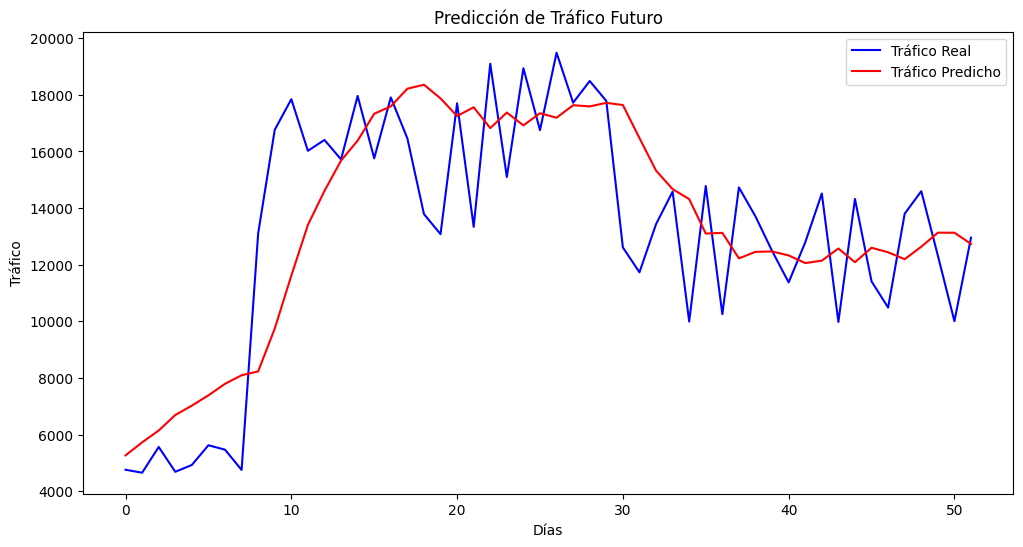

In [28]:
# Gráfica de resultados
real_traffic = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(12, 6))
plt.plot(real_traffic, color="blue", label="Tráfico Real")
plt.plot(predicted_traffic, color="red", label="Tráfico Predicho")
plt.title("Predicción de Tráfico Futuro")
plt.xlabel("Días")
plt.ylabel("Tráfico")
plt.legend()
plt.show()
